# Introduction to Genomic Technologies

The probability of observing a statistic that extreme if the null hypothesis is true.

## Overview and Molecular Biology

## Measurement Technology

## Computing Technology

## Data Science Technology

# Python for Genomic Data Science

## Implementation of the naive exact matching algorithm:

In [1]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


Function that takes a DNA string and returns its reverse complement:

In [2]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'} # Dictionary lookup
    t = ''
    for base in s:
        t = complement[base] + t
    return t


Function that parses a DNA reference genome from a file in the FASTA format.

In [3]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


Function that parses the read and quality strings from a FASTQ file containing sequencing reads.

In [4]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

### Solution

In [32]:
def naive_with_rc(p, t):
    occurrences = naive(p,t)
    if reverseComplement(p) != p:
        occurrences.extend(naive(reverseComplement(p), t))
    return occurrences

### Testing

In [34]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [33]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [36]:
# Phi-X genome
import os

# Change the directory
new_dir = "Data"
os.chdir(new_dir)
current_dir = os.getcwd()
print("New Working Directory:", current_dir)

!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
os.chdir("/home/sunzid/Study/Course/Biology/Genomic Data Science")

# Get the new current working directory
current_dir = os.getcwd()
print("New Working Directory:", current_dir)

--2024-03-10 14:34:02--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 13.226.191.118, 13.226.191.126, 13.226.191.229, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|13.226.191.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2024-03-10 14:34:02 (126 MB/s) - ‘phix.fa’ saved [5528/5528]



In [37]:
phix_genome = readGenome('Data/phix.fa')

In [38]:
occurrences = naive_with_rc('ATTA', phix_genome)

In [39]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


In [40]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


In [41]:
lambda_genome = readGenome('Data/lambda_virus.fa')

In [43]:
p = 'AGGT'
occurrences = naive_with_rc(p, lambda_genome)

print('# occurrences: %d' % len(occurrences))

# occurrences: 306


In [44]:
p = 'TTAA'
occurrences = naive_with_rc(p, lambda_genome)

print('# occurrences: %d' % len(occurrences))

# occurrences: 195


In [47]:
p = 'ACTAAGT'
occurrences = naive_with_rc(p, lambda_genome)

print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 26028


In [46]:
p = 'AGTCGA'
occurrences = naive_with_rc(p, lambda_genome)

print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 450


In [48]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        misMatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                misMatch += 1
        if misMatch < 3:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [49]:
p = 'ACTTTA'
occurrences = naive_2mm(p, 'ACTTACTTGATAAAGT')
occurrences


[0, 4]

In [50]:
p = 'TTCAAGCC'
occurrences = naive_2mm(p, lambda_genome)

print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 45


In [51]:
p = 'AGGAGGTT'
occurrences = naive_2mm(p, lambda_genome)

print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 49


In [72]:
# Phi-X genome
import os

# Change the directory
new_dir = "Data"
os.chdir(new_dir)
current_dir = os.getcwd()
print("New Working Directory:", current_dir)

!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
os.chdir("/home/sunzid/Study/Course/Biology/Genomic Data Science")

# Get the new current working directory
current_dir = os.getcwd()
print("New Working Directory:", current_dir)




New Working Directory: /home/sunzid/Study/Course/Biology/Genomic Data Science/Data
--2024-03-10 14:56:14--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 143.204.153.96, 143.204.153.19, 143.204.153.210, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|143.204.153.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  1.34MB/s    in 0.2s    

2024-03-10 14:56:15 (1.34 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]

New Working Directory: /home/sunzid/Study/Course/Biology/Genomic Data Science


This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [74]:
humanError_genome, humanError_quality = readFastq('Data/ERR037900_1.first1000.fastq')
print(humanError_genome[10:],'\n', humanError_quality[10:])

['CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAANCCTAACCCTAACCCTAACCCTAACCCTAACCCT', 'CTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCNTAACCCTAACCCTAACCCTAACCCTAACCCTAA', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTGACCCTACACCTAAC', 'GTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGNGTAGGGTTAGGGTTAGGGGTAGGGTTAGGGGTA', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCGTACCC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTACCC', 'ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTANCCCTAACCCTAACCCTAACCCTAACCCTAACCC', 'ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTANCCCTAACCCTAACCCTAACCCTAACCCTAACCC', 'ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC

In [75]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [76]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(humanError_quality)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


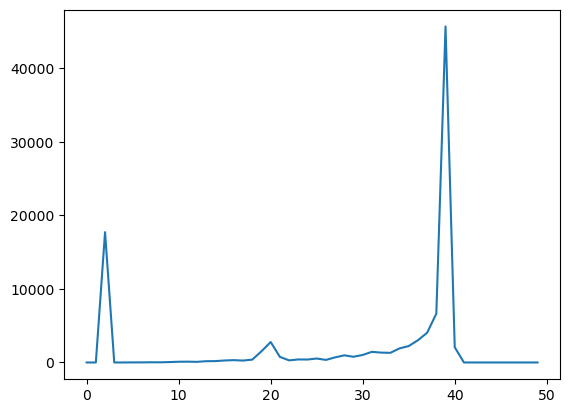

In [77]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

In [81]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*len(qualities[0])
    for i in range(len(qualities[0])):
        for qual in qualities:
            hist[i] += phred33ToQ(qual[i])
    return hist
h = createHist(humanError_quality)
print(h)

[38435, 38460, 38400, 38428, 38417, 38382, 38362, 38364, 38325, 38343, 38194, 38154, 38089, 38152, 38153, 38099, 38055, 38041, 38067, 38150, 38087, 37989, 38009, 37909, 38028, 37576, 37514, 37503, 37578, 37552, 37629, 37555, 37548, 37433, 37402, 37343, 37198, 37126, 37158, 36904, 36742, 36677, 36645, 36493, 36509, 36375, 36205, 35974, 35847, 35673, 34832, 34739, 34399, 34402, 34025, 33025, 32882, 32741, 32573, 32224, 30805, 30666, 30343, 30131, 29463, 17891, 4526, 17881, 17865, 17852, 17466, 17131, 17134, 17098, 16852, 23745, 23958, 23221, 22902, 22366, 20904, 20584, 20383, 19767, 19095, 18061, 17757, 17152, 16972, 16286, 14811, 14679, 14310, 14152, 13734, 12538, 12278, 12179, 11676, 11561]


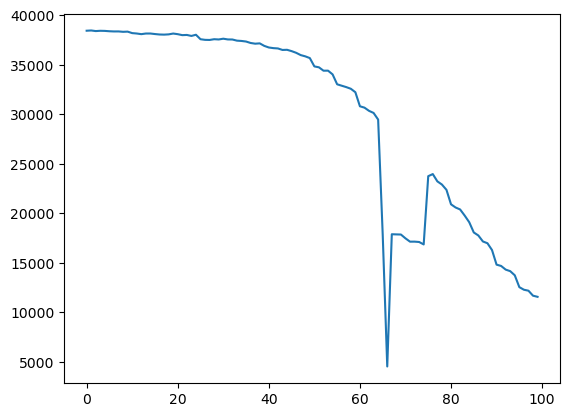

In [82]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

In [84]:
h.index(min(h))

66